In [529]:
#import libraries
import random
import pandas as pd
import json
from preprocessor import NLP #our natural language processing functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

In [530]:
def import_data(): #imports dataset as ["category", "user query", "chatbot response"]
    with open("data.json") as intent: #load jsons
        data = json.load(intent)
    df = pd.DataFrame(data['intents'])
    df2 = df[['intent', "text", "responses"]] #choose specific columns
    df2 = df2.rename(columns={"text":"in", "responses":"out"}) #making it more readable

    return df2

In [531]:
def get_tree():
    t = DecisionTreeClassifier(
        criterion="gini", 
        splitter="best",
        max_depth = 4,
        min_samples_leaf = 100,
        min_samples_split = 1000,
        random_state=1)
    
    df = import_data()
    return df

In [532]:
df = import_data()
df["intent"] = df["intent"].apply(lambda x: str.lower(x))
df["in"] = df["in"].apply(lambda x: [str.lower(n) for n in x])
# df["out"] = df["out"].apply(lambda x: [str.lower(n) for n in x])
df.head(5)

,intent,in,out
0,greeting,"[hi, hi there, hola, hello, hello there, hya, ...","[Hi how are you?, Hello, Hey]"
1,greetingresponse,"[my name is chatbot, this is chatbot, i am cha...","[Great! Hi! How can I help?, Good! Hi, how can..."
2,courtesygreeting,"[how are you?, hi how are you?, hello how are ...","[Hello, I am great, how are you? , Hello, how ..."
3,courtesygreetingresponse,"[good thanks! my name is chatbot, good thanks!...","[Great! Hi! How can I help?, Good! Hi, how can..."
4,currenthumanquery,"[what is my name?, what do you call me?, who d...","[You are! How can I help?, Your name is , how ..."


In [533]:
temp = pd.DataFrame(columns=["intent", "in", "out"])
for index, row in df.iterrows():
    for i in row["in"]:
        temp.loc[len(temp.index)] = [row["intent"], i, row["out"]]
df = temp.sort_values("intent")
df = df.reset_index()
df.drop("index", axis=1, inplace=True)
df.head(5)

,intent,in,out
0,clever,you are a very clever girl,"[Thank you, I was trained that way, I was trai..."
1,clever,genious,"[Thank you, I was trained that way, I was trai..."
2,clever,clever girl,"[Thank you, I was trained that way, I was trai..."
3,clever,you are very clever,"[Thank you, I was trained that way, I was trai..."
4,clever,you are a very intelligent girl,"[Thank you, I was trained that way, I was trai..."


In [534]:
cvin = []
for i in df["in"]:
    cvin.append(i)

cv = CountVectorizer()
cvout = cv.fit_transform(cvin).toarray()
cvwords = cv.get_feature_names_out()

cvdf = pd.DataFrame(columns=cvwords, data=cvout)

df2 = pd.concat([df["intent"], cvdf], axis=1)
df2.head(5)

,intent,about,adios,am,any,anyone,are,aware,bay,be,bored,by,bye,call,camera,can,chatbot,chatbotous,cheering,clever,communicating,comprendo,conscious,could,do,doing,door,enough,for,friends,fuck,genious,get,girl,give,good,goodbye,gossip,got,great,have,hear,hello,help,helpful,hi,hola,hope,how,hya,identify,in,intelligent,is,it,joke,jokes,know,later,laugh,make,me,mean,meant,more,my,name,need,not,off,ok,open,please,pod,prove,quiet,real,saying,see,self,shhh,shit,shut,some,speaking,stop,surely,talking,tell,thank,thanks,that,the,there,think,this,time,to,twat,understand,up,very,want,was,wasn,well,what,who,why,will,with,you,your
0,clever,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,clever,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,clever,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,clever,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,clever,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [535]:
nlp = NLP()

def get_intent(string): #string = user query
    arr = nlp.getlemmas(string)
    highscore = 0
    intent = ""
    for word in arr:
        for i, row in df.iterrows():
            score = 0
            try:
                if df.loc[i, word] == 1:
                    score += 1
            except:
                pass
            if score > highscore:
                intent = row["intent"]
    print(intent)
    print(df.iloc[df["intent"] == intent, 2])

In [536]:
x = df2.drop("intent", axis=1)
y = df2["intent"]

In [537]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [538]:
#make a model and fit to data
model = DecisionTreeClassifier(
    criterion="gini", 
    splitter="best",
    random_state=1)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [539]:
model.score(xtest, ytest)

0.7241379310344828

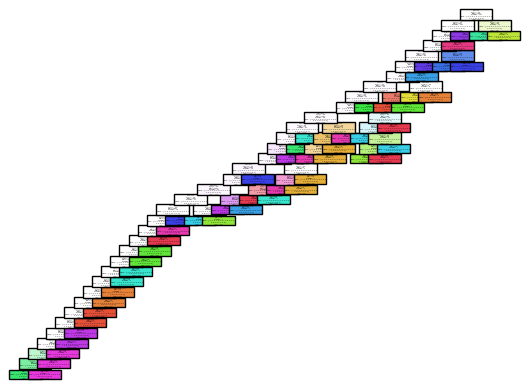

In [540]:
#yikes looks a little overfitted, but its to be expected with such a small dataset
_ = tree.plot_tree(model,
    node_ids=True,
    class_names=True,
    filled=True)

In [541]:
def predict(string): #string = "user input"
    #output: array for decision tree
    arr = nlp.getlemmas(string)

    temp = pd.DataFrame(columns=cvwords, data=[[0 for x in cvwords]])
    i = 0
    for col in temp.columns:
        for i in arr:
            if col == i:
                temp[col] = 1
    return model.predict(temp)[0]

def respond(string): #string = "user input"
    intent = predict(string)
    try:
        responses = df.loc[df["intent"] == intent, "out"]
        r = random.randint(0, len(responses.iloc[0]) - 1)
        choice = responses.iloc[0][r]
        return choice
    except:
        return "Sorry, I don't understand."

In [542]:
userinput = "[start conversation]"
print("-"  * 50)
print("You are now talking to chatbot. Text \"quit\" to end conversation")
print("-"  *  50)
userinput = input()
while not (userinput == "quit" or userinput == ""):
    print(userinput)
    print(">>>", respond(userinput))
    userinput = input()
print(">>> [end conversation]")


--------------------------------------------------
You are now talking to chatbot. Text "quit" to end conversation
--------------------------------------------------
hi chatbot
>>> OK! hi, what can I do for you?
nice to meet you!
>>> Hey
>>> [end conversation]
